In [1]:
%cd "/content/drive/MyDrive/Viettel phase #2/Project/Clone/Main_file"

[WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/Viettel phase #2/Project/Clone/Main_file'
F:\Work\Viettel #2 ver 2\Clone\voice-verification


In [2]:
# !unzip dataset/dataset.zip -d dataset
# !pip install -r requirements.txt

In [3]:
# !pip install pandas

In [4]:
import csv
import itertools
from pathlib import Path
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import wavfile
from tqdm import tqdm
import glob
%matplotlib inline

In [6]:
def generate_checklist(raw_path):
    """
    Generate train test lists for zalo data
    """
    root = Path(raw_path)
    classpaths = [d for d in root.iterdir() if d.is_dir()]
    checklist = []
    checkdict = {}
    for classpath in classpaths:
        filepaths = list(classpath.glob('*.wav'))

        non_augment_path = list(
            filter(lambda x: 'augment' not in str(x), filepaths))

        label = str(non_augment_path[0].parent.stem.split('-')[0])

        checklist = [str(x).replace(raw_path, '') for x in non_augment_path[:]]
        checkdict[label] = list(itertools.combinations(checklist, 2))

    return checkdict


def convert_to_csv(checkdict, save_root):
    write_file = Path(save_root, 'checklist.csv')
    with open(write_file, 'w', newline='') as wf:
        spamwriter = csv.writer(wf, delimiter=',')
        spamwriter.writerow(['ref', 'com'])
        for k, v in checkdict.items():
            for v_ in v:
                spamwriter.writerow([v_[0], v_[1]])
    pass

In [7]:
def plot_spec(filepath):
    samplingFrequency, signalData = wavfile.read(filepath)

    # Plot the signal read from wav file
    plt.subplot(211)

    plt.title('Spectrogram of a wav file')
    plt.plot(signalData)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    plt.subplot(212)

    plt.specgram(signalData, Fs=samplingFrequency)
    plt.xlabel('Time')
    plt.ylabel('Frequency')

    plt.show()

In [ ]:
dic = generate_checklist("dataset/wavs/")
# dic
# for k, v in dic.items():
#     print(k, ':', len(v))

convert_to_csv(dic, "dataset")

df = pd.read_csv("dataset/checklist_result.csv")
c = 0
wrong_label = {}
for i, label in enumerate(list(df['label'])):
    if int(label) == 0:
        c += 1
#         print(df['audio_1'][i], '||', df['audio_2'][i], ':', df['score'][i])

        if df['audio_1'][i] not in wrong_label:
            wrong_label[df['audio_1'][i]] = 0
        if df['audio_2'][i] not in wrong_label:
            wrong_label[df['audio_2'][i]] = 0
        wrong_label[df['audio_1'][i]] += 1
        wrong_label[df['audio_2'][i]] += 1

print("Total wrong label:", c)
print("===================================================================")
c = 0
for i, score in enumerate(list(df['score'])):
    if score < 0.4:
        c += 1
#         print(df['audio_1'][i], '||', df['audio_2'][i], df['score'][i])
print('Total wrong score:', c)
print('================================================================')
# sort wrong label

wrong_label = {k: v for k, v in sorted(wrong_label.items(), key=lambda item: item[1], reverse=True)}
# for k, v in wrong_label.items():
#     if v > 1:
#         print(k, ':', v)

## check all

In [9]:
len(glob.glob('dataset/wavs/*'))
folder = sorted(os.listdir('dataset/wavs/'), key=lambda x: int(x.split('-')[0]))

['5-F-27',
 '6-M-45',
 '7-F-40',
 '8-M-28',
 '9-F-26',
 '43-F-27',
 '44-M-28',
 '45-F-25',
 '46-M-37',
 '47-F-36',
 '48-M-34',
 '49-F-26',
 '50-M-33',
 '51-F-30',
 '52-M-31',
 '53-F-27',
 '54-M-33',
 '55-F-35',
 '56-M-40',
 '57-F-39',
 '58-M-27',
 '59-F-29',
 '60-M-26',
 '61-F-28',
 '62-M-31',
 '63-F-27',
 '64-M-30',
 '65-F-30',
 '66-M-26',
 '67-F-26',
 '68-M-53',
 '69-F-39',
 '70-M-38',
 '71-F-31',
 '72-M-38',
 '73-F-32',
 '74-M-33',
 '75-F-25',
 '76-M-32',
 '77-F-25',
 '78-M-34',
 '79-F-27',
 '80-M-34',
 '81-F-31',
 '82-M-26',
 '83-F-25',
 '84-M-30',
 '85-F-25',
 '86-M-31',
 '87-F-26',
 '88-M-33',
 '89-F-26',
 '90-F-50',
 '91-F-29',
 '92-M-33',
 '93-F-23',
 '94-M-23',
 '95-F-28',
 '96-M-29',
 '97-F-26',
 '98-M-31',
 '99-F-40',
 '272-M-26',
 '424-M-28',
 '425-F-27',
 '426-F-48',
 '427-M-45',
 '428-M-25',
 '429-F-25',
 '430-M-28',
 '431-F-27',
 '432-M-27',
 '433-F-26',
 '434-F-30',
 '435-M-31',
 '436-M-30',
 '437-F-27',
 '438-M-40',
 '439-F-38',
 '440-F-29',
 '441-M-37',
 '442-M-36',
 

In [10]:
# rename all file
for f in tqdm(glob.glob('dataset/wavs/*')[:]):
    audio_files = os.listdir(f)
    for i, af in enumerate(audio_files):
        new_name = f"{af.replace('.wav', '').split('-')[0]}_{i}.wav"
        if os.path.exists(os.path.join(f, new_name)):
            continue
        else:
            # os.rename(os.path.join(f, af), os.path.join(f, new_name))
            pass


100%|██████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 1950.66it/s]


check folder

In [790]:
index = 133
audio_in_folder = [str(Path(x)) for x in glob.glob(f'dataset/wavs/{folder[index]}/*.wav')]
nfiles = [len(os.listdir(x)) for x in glob.glob(f'dataset/wavs/*')]
sum(nfiles[:index]), len(audio_in_folder), audio_in_folder[0]

(4171, 21, 'dataset\\wavs\\494-M-33\\494_0.wav')

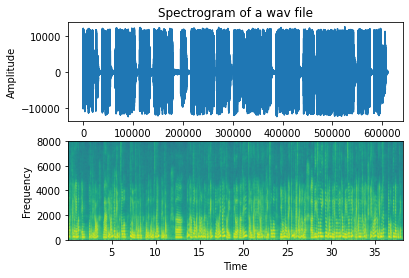

In [846]:
#  listen to specific file
filename = "739-F-29\\739_2"
path = str(Path(f"dataset\\wavs\\{filename}.wav"))
plot_spec(path)
ipd.Audio(path, autoplay=True)

In [797]:
#  check VAD segments
from utils import *
vad_engine = VAD(frame_duration=30, win_length=100)
segments = vad_engine.detect(path, write=False, show=True)
print("Total:", len(segments))

111+(0.0)11111111111111111111111111111111111111__11111111111111111111_111111111111111111111111111111111111111111111111111111111111111111111111__111111111111111111111111111111111111111111111111111111111___-(5.940000000000005)_______111+(6.150000000000007)11111111111111111111111111111111111111111111111111111___-(7.920000000000021)_____111+(8.07000000000002)111111111111_11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111___-(11.669999999999943)____111+(11.78999999999994)111111111111111111___-(12.509999999999925)____111+(12.629999999999923)11111111111111111111111111111111111111111111111111111___-(14.399999999999885)111+(14.399999999999885)11_11111111111111111111111111111111111___-(15.719999999999857)_______111+(15.929999999999852)111111111111111111111111111111111111111__111111111111111111111111111111111111___-(18.41999999999994)____111+(18.539999999999946)11111111111111111__1111111111111111111111111111111111111111111111111111111111111111111

In [847]:
import time
import librosa
import IPython.display as ipd
from IPython.display import clear_output

nfiles = [len(os.listdir(x)) for x in glob.glob(f'dataset/wavs/*')]
start_id = 377

for index in range(start_id, 400):
    audio_in_folder = [str(Path(x)) for x in glob.glob(f'dataset/wavs/{folder[index]}/*.wav')]
    print(folder[index], 'id:', index, 'count:', sum(nfiles[:index]))
    for i, f in enumerate(audio_in_folder):
        path  = str(Path(f))
        print(f"[{i + 1}/{len(audio_in_folder)}] {path}")

        audio = ipd.Audio(path, autoplay=True) 
        ipd.display(audio)

        duration = librosa.get_duration(filename=path)
        time.sleep(duration + 0.5)
    time.sleep(1.0)
    clear_output(wait=True)

812-M-27 id: 399 count: 10609
[1/21] dataset\wavs\812-M-27\812_0.wav


[2/21] dataset\wavs\812-M-27\812_1.wav


[3/21] dataset\wavs\812-M-27\812_10.wav


[4/21] dataset\wavs\812-M-27\812_11.wav


[5/21] dataset\wavs\812-M-27\812_12.wav


[6/21] dataset\wavs\812-M-27\812_13.wav


[7/21] dataset\wavs\812-M-27\812_14.wav


[8/21] dataset\wavs\812-M-27\812_15.wav


[9/21] dataset\wavs\812-M-27\812_16.wav


[10/21] dataset\wavs\812-M-27\812_17.wav


[11/21] dataset\wavs\812-M-27\812_18.wav


[12/21] dataset\wavs\812-M-27\812_19.wav


[13/21] dataset\wavs\812-M-27\812_2.wav


[14/21] dataset\wavs\812-M-27\812_20.wav


[15/21] dataset\wavs\812-M-27\812_3.wav


[16/21] dataset\wavs\812-M-27\812_4.wav


[17/21] dataset\wavs\812-M-27\812_5.wav


[18/21] dataset\wavs\812-M-27\812_6.wav


[19/21] dataset\wavs\812-M-27\812_7.wav


[20/21] dataset\wavs\812-M-27\812_8.wav


[21/21] dataset\wavs\812-M-27\812_9.wav


In [851]:

for i, f in enumerate(glob.glob(f'dataset/wavs/751-F-31/*.wav')):
    path  = str(Path(f))
    print(f"[{i + 1}/{len(audio_in_folder)}] {path}")

    audio = ipd.Audio(path, autoplay=True) 
    ipd.display(audio)

    duration = librosa.get_duration(filename=path)
    time.sleep(duration + 0.5)

[1/21] dataset\wavs\751-F-31\751_0.wav


[2/21] dataset\wavs\751-F-31\751_1.wav


[3/21] dataset\wavs\751-F-31\751_2.wav


[4/21] dataset\wavs\751-F-31\751_3.wav


[5/21] dataset\wavs\751-F-31\751_4.wav


[6/21] dataset\wavs\751-F-31\751_5.wav


[7/21] dataset\wavs\751-F-31\751_6.wav


[8/21] dataset\wavs\751-F-31\751_7.wav


[9/21] dataset\wavs\751-F-31\751_8.wav


[10/21] dataset\wavs\751-F-31\751_9.wav
